In [1]:
pip install cvxpy

     |████████████████████████████████| 2.8 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 189 kB 44.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.7 MB 46.1 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 95.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 24.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin
import pickle as pkl
import itertools as it
from tqdm.notebook import tqdm

In [4]:
if "./param_tools/" not in sys.path: sys.path.append("./param_tools/")
import param_tools

In [5]:
n_samples=10000
topwidth = 1 #always

height = 1
basewidth = 1.1
epsilon = (basewidth - topwidth)/2

In [6]:
intriangles = np.random.rand(n_samples) <= epsilon / (1 + epsilon)
intriangles.mean()

0.0495

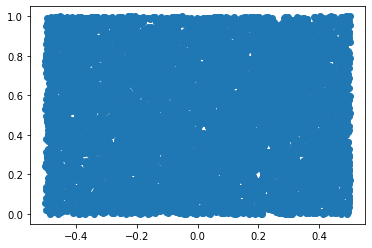

In [7]:
plt.figure()
n_triangles_points =  np.count_nonzero(intriangles)
n_rectangle_points = n_samples - n_triangles_points
rectangle_points = np.random.rand(n_rectangle_points, 2)
rectangle_points[:, 0] -= .5
plt.scatter(rectangle_points[:, 0], rectangle_points[:, 1])

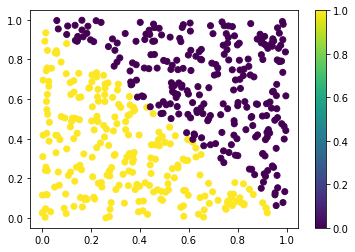

In [8]:
triangles_points = np.random.rand(n_triangles_points, 2)
in_first_triangle = triangles_points[:, 0] <= (1 - triangles_points[:, 1])
plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)

plt.colorbar()

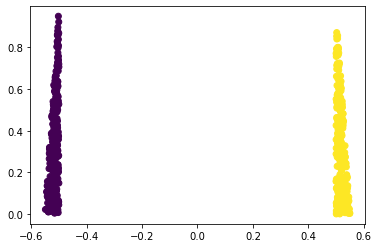

In [9]:
triangles_points = np.random.rand(n_triangles_points, 2)
in_first_triangle = triangles_points[:, 0] <= (1 - triangles_points[:, 1])
#plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)

triangles_points[:, 0] *= epsilon
triangles_points[in_first_triangle, 0]+= .5
triangles_points[~in_first_triangle, 1] = 1 - triangles_points[~in_first_triangle][:, 1]
triangles_points[~in_first_triangle, 0] -= epsilon + .5

plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)


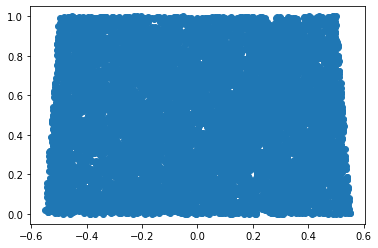

In [10]:
samples = np.empty((n_samples, 2))
samples[intriangles] = triangles_points
samples[~intriangles] = rectangle_points
plt.scatter(samples[:, 0], samples[:, 1])

In [11]:
from algorithm import factorize

results = factorize(sample)

NameError: name 'sample' is not defined

# results on trapezoid

In [ ]:
#output by code on the original paper
with open("../trapezoid/results.pkl", "rb") as f:
    results_trap = pkl.load(f)

In [ ]:
results_trap

In [12]:
def get_from_dict(d, values, sep=","):
    return [d[i.strip()] for i in values.split(sep)]

In [ ]:
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
    get_from_dict(results_trap, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")



In [ ]:
data.shape

In [ ]:
phi.shape

In [ ]:
manifolds

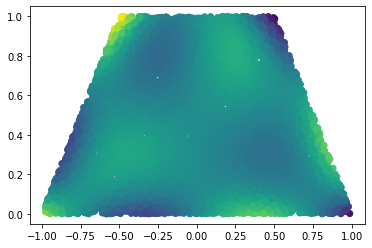

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=phi[:, 2])

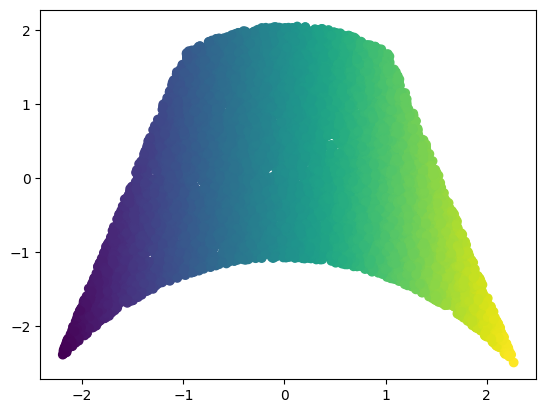

In [ ]:
plt.scatter(phi[:, 1], phi[:, 2], c=phi[:, 1])

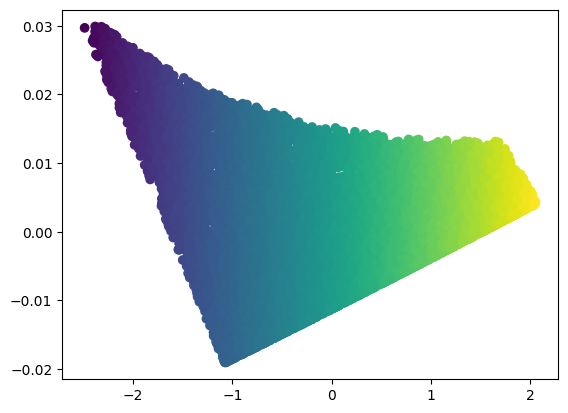

In [ ]:
plt.scatter(phi[:, 2], phi[:, 3], c=phi[:,2])

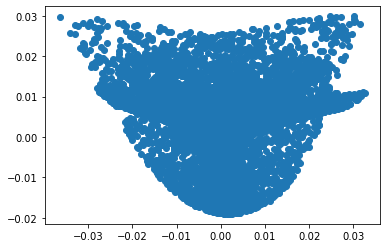

In [53]:
plt.scatter(phi[:, 8], phi[:, 3])

## Test param_tools

Use `param_tools` byx Max Kapur to sample from more complicated stuff

In [13]:
from param_tools import r_surface

In [14]:
X_grid, Y_grid = np.meshgrid(np.linspace(0,1, 100), 
                             np.linspace(0,1,100), indexing="ij")


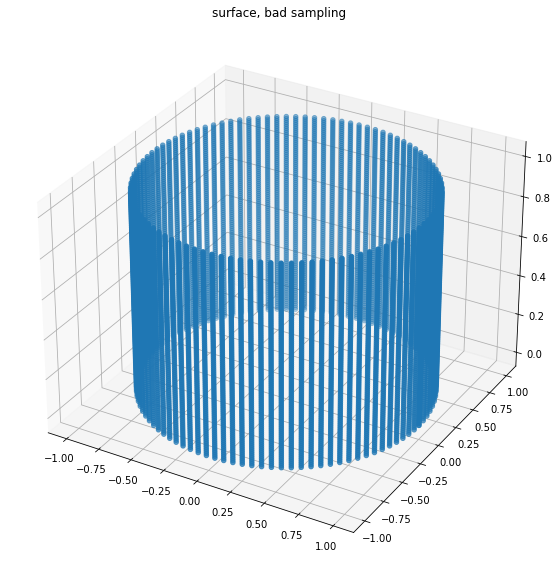

In [15]:
surface = lambda theta, z: np.array(((1)* cos(2 * np.pi * theta), 
                            (1) * sin(2 * np.pi * theta),
                            z))
                            
surface_values = surface(X_grid, Y_grid)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("surface, bad sampling")
#ax.set_box_aspect((np.ptp(testset_3D[...,0]), np.ptp(testset_3D[...,1]), np.ptp(testset_3D[...,2])))
p = ax.scatter(surface_values[0],
               surface_values[1],
               surface_values[2]
   )
#fig.colorbar(p)


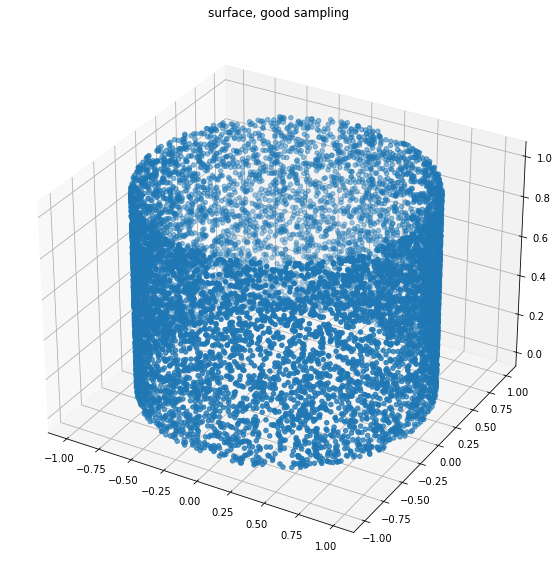

In [16]:
good_sample, *_ = r_surface(10000, surface, 0, 1, 0, 1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("surface, good sampling")
#ax.set_box_aspect((np.ptp(testset_3D[...,0]), np.ptp(testset_3D[...,1]), np.ptp(testset_3D[...,2])))
p = ax.scatter(good_sample[0],
               good_sample[1],
               good_sample[2]
   )



In [17]:
from algorithm import factorize

results = factorize(data=good_sample.T, sigma=0.5, n_eigenvectors=100, 
                    n_factors=2, 
                    eig_crit = 10,
  sim_crit = .7, seed=255)
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
    get_from_dict(results, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")


[==================  ] 90%
Manifolds...
Manifold #1 [ 1  3  5  7 18 28 37 38 56 59]
Manifold #2 [ 2  4  6 12 13 16 17 25 26 35 48 49 57 58]


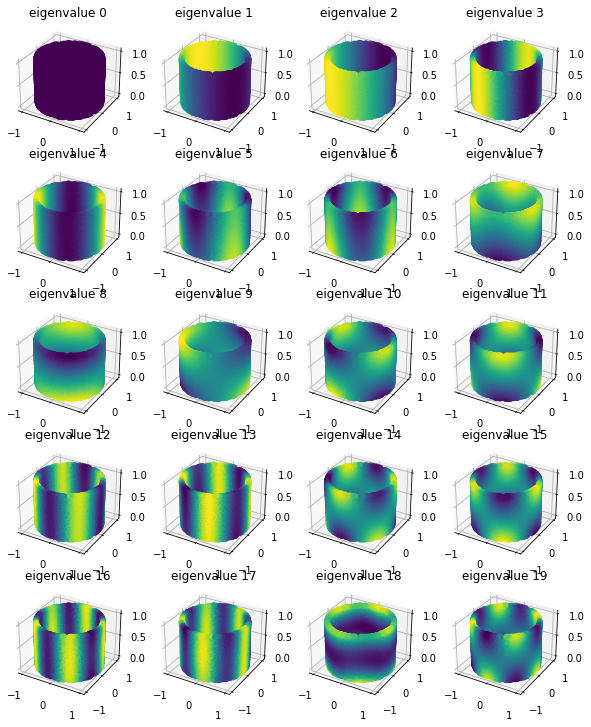

In [18]:
n_display = 20
_, axes = plt.subplots(n_display//4, 4, figsize=(10, 10 * n_display / 16),
                      subplot_kw=dict(projection='3d'))

for ax, eigen, i in zip(axes.flat, phi.T, it.count()):
    ax.scatter(good_sample[0],
               good_sample[1],
               good_sample[2],
               c=eigen
              )
    ax.set_title(f"eigenvalue {i}")
    
#plt.tight_layout()

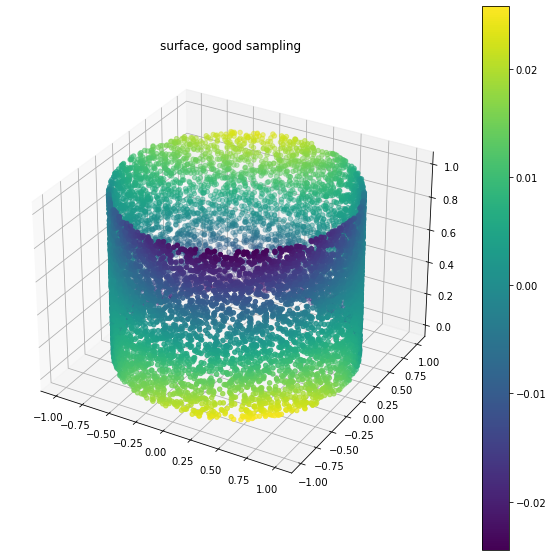

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("surface, good sampling")
#ax.set_box_aspect((np.ptp(testset_3D[...,0]), np.ptp(testset_3D[...,1]), np.ptp(testset_3D[...,2])))
p = ax.scatter(good_sample[0],
               good_sample[1],
               good_sample[2],
               c=phi[:, 8]
   )
plt.colorbar(p)


In [20]:
phi.shape

(10000, 100)

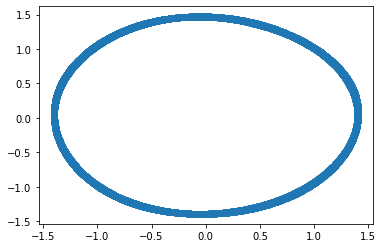

In [21]:
plt.figure()
plt.scatter(phi[:, 1], phi[:, 2])


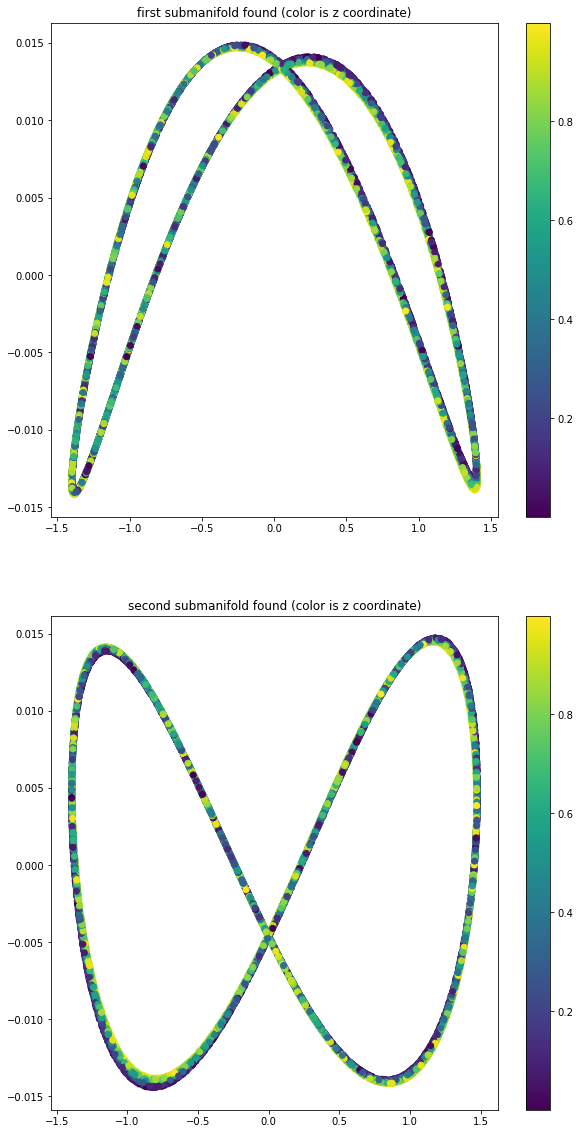

In [30]:
#plot, axes = plt.subplots(1,2,figsize=(15, 5))
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(2, 1, 1)
p = ax.scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], c=good_sample[2])
plt.title("first submanifold found (color is z coordinate)")
plt.colorbar(p)
ax = fig.add_subplot(2, 1, 2)
p = ax.scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]], c=good_sample[2])
plt.title("second submanifold found (color is z coordinate)")
plt.colorbar(p)

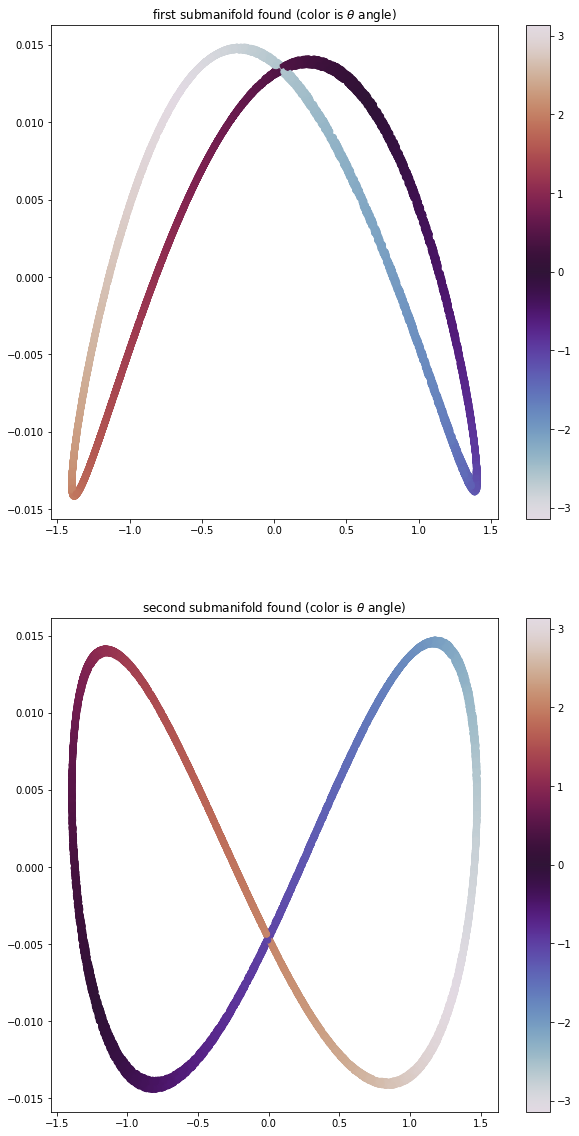

In [36]:
from numpy import arctan2 as atan2
#plot, axes = plt.subplots(1,2,figsize=(15, 5))
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(2, 1, 1)
p = ax.scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], c=atan2(good_sample[0], good_sample[1]), cmap="twilight")
plt.title("first submanifold found (color is $\\theta$ angle)")
plt.colorbar(p)
ax = fig.add_subplot(2, 1, 2)
p = ax.scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]], c=atan2(good_sample[0], good_sample[1]), cmap="twilight")
plt.title("second submanifold found (color is $\\theta$ angle)")
plt.colorbar(p)

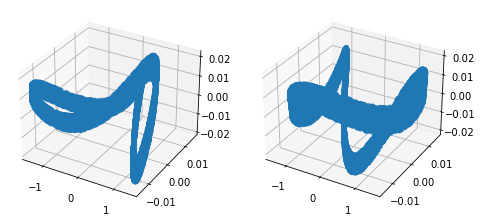

In [29]:
#plot, axes = plt.subplots(1,2,figsize=(15, 5))
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], phi[:, manifolds[0][2]])
ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]], phi[:, manifolds[1][2]])


In [84]:
from sklearn.manifold import LocallyLinearEmbedding

In [87]:
manifold0 = np.stack([phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], phi[:, manifolds[0][2]]]).T
manifold0 = LocallyLinearEmbedding(n_neighbors=20).fit_transform(manifold0)


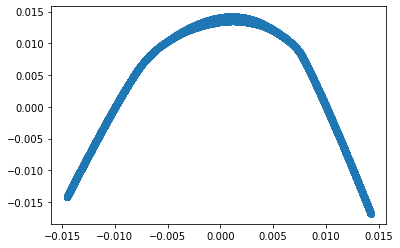

In [88]:
plt.figure()
plt.scatter(manifold0[:, 0], manifold0[:, 1])

  0%|          | 0/6 [00:00<?, ?it/s]

Stored 'results_def' (list)


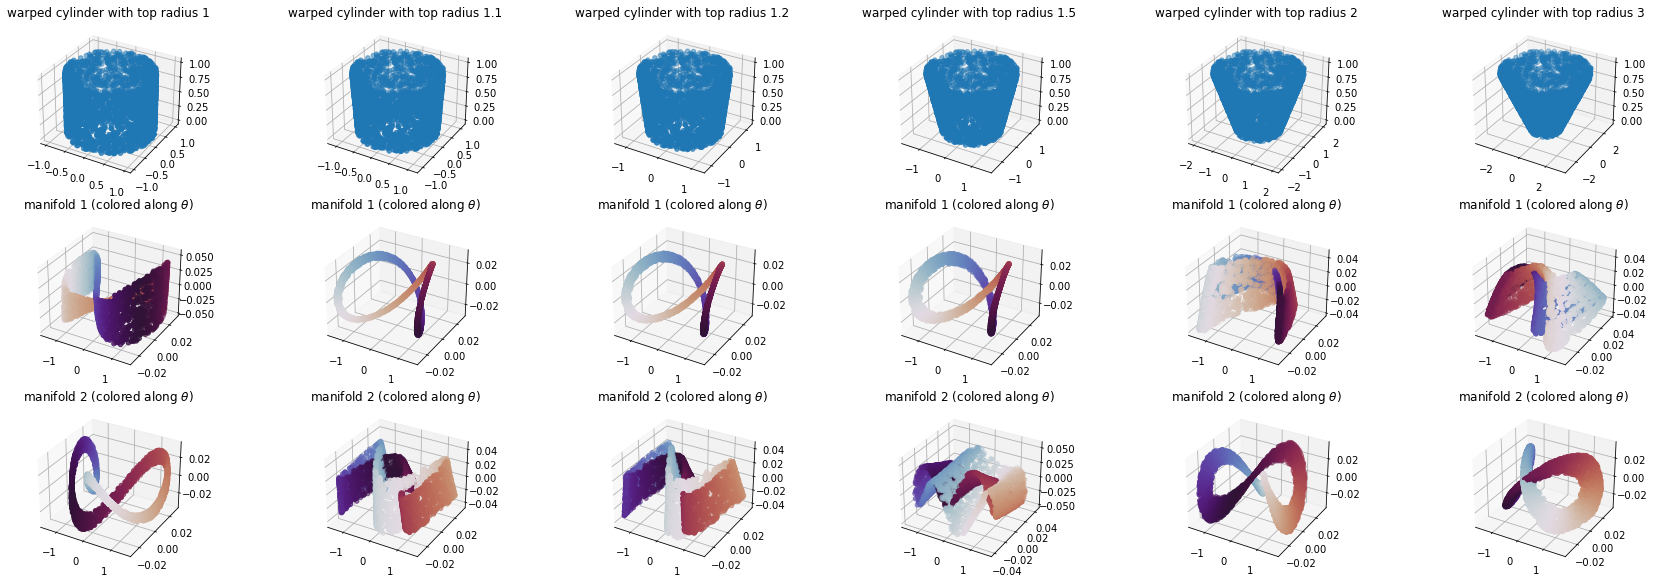

In [51]:
deformations = [0, .1, .2, .5, 1, 2]

_, axes = plt.subplots(3, len(deformations),
                       figsize= (1.5 * n_display, 10),
                      subplot_kw=dict(projection='3d')
                      )

#sample_d_list = [None] * len(deformations)

#results_def = [None] * len(deformations)

for d, column, i in zip(tqdm(deformations), axes.T, it.count()) :
    surface_d = lambda theta, z: np.array(((d*z+1)* cos(2 * np.pi * theta), 
                            (d*z+1) * sin(2 * np.pi * theta),
                            z))    
    
    if results_def[i] is None:
        sample_d, *_ = r_surface(3000, surface_d, 0, 1, 0, 1)
        sample_d_list[i] = sample_d
        results_def[i] = factorize(data=sample_d.T, sigma=0.5, n_eigenvectors=20, 
                    n_factors=2, 
                    eig_crit = 10,
                sim_crit = .6, 
                        seed=255)
        
    sample_d = sample_d_list[i]
    column[0].set_title(f"warped cylinder with top radius {d + 1}")
    #ax.set_box_aspect((np.ptp(testset_3D[...,0]), np.ptp(testset_3D[...,1]), np.ptp(testset_3D[...,2])))
    column[0].scatter(
        sample_d[0],
       sample_d[1],
       sample_d[2]
    )


    data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
            get_from_dict(results_def[i], "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")
    
    column[1].scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], phi[:, manifolds[0][2]], c = atan2(sample_d[0], sample_d[1]),cmap = "twilight")
    column[1].set_title("manifold 1 (colored along $\\theta$)")
    column[2].scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]], phi[:, manifolds[1][2]], c = atan2(sample_d[0], sample_d[1]), cmap="twilight")
    column[2].set_title("manifold 2 (colored along $\\theta)$")


    
    
%store results_def

  0%|          | 0/5 [00:00<?, ?it/s]

Stored 'results_def' (list)


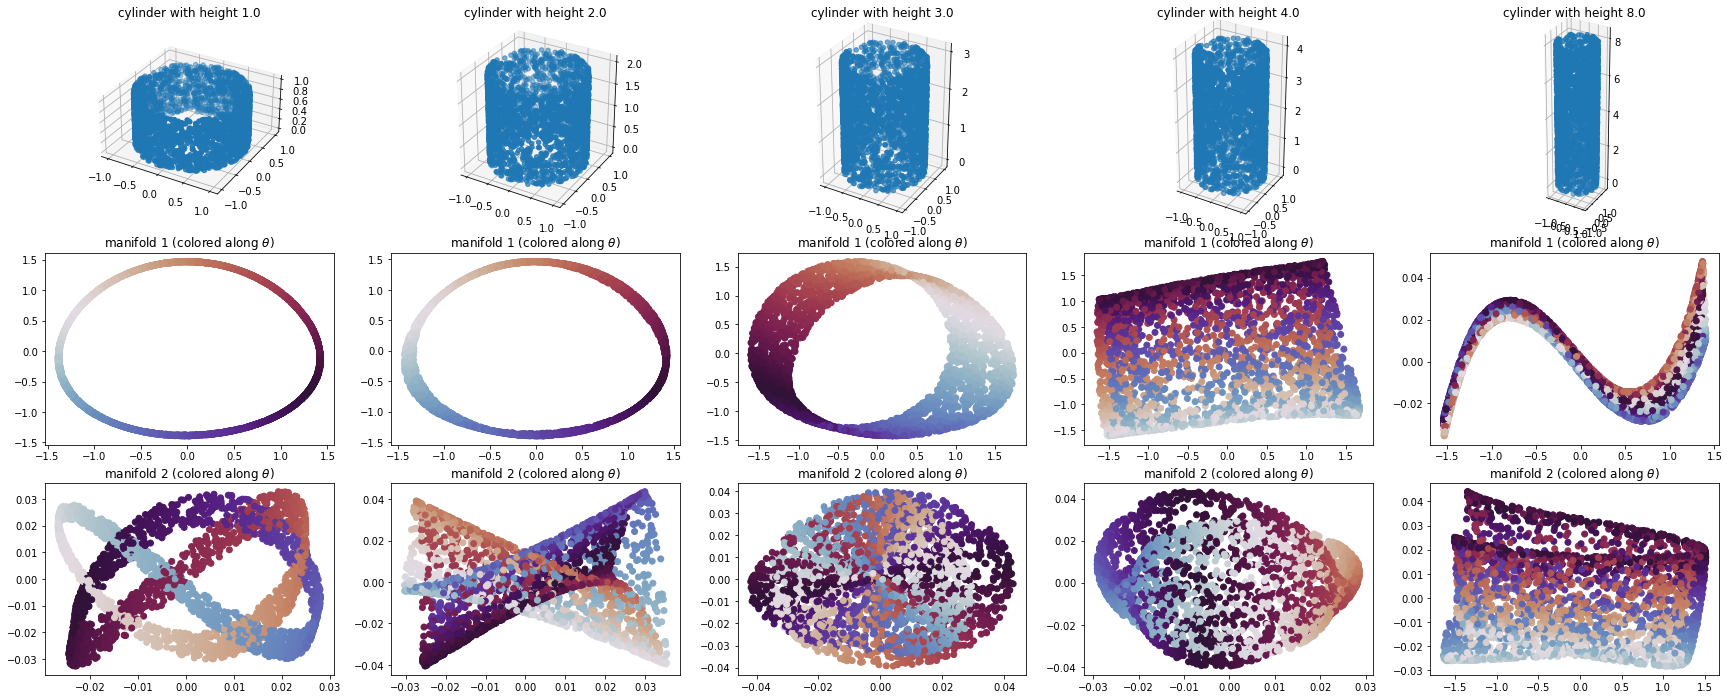

In [72]:
heights = [1., 2., 3., 4., 8.]

#_, axes = plt.subplots(3, len(heights),
#                       figsize= (1.5 * n_display, 10),
#                      subplot_kw=dict(projection='3d')
#                      )

fig = plt.figure(figsize= (1.5 * n_display, 12))

#sample_d_list = [None] * len(deformations)

#results_def = [None] * len(deformations)

for height, i in zip(tqdm(heights), it.count()) :
    surface_d = lambda theta, z: np.array((cos(2 * np.pi * theta), 
                            sin(2 * np.pi * theta),
                            z * height
                            ))
    
    if results_def[i] is None:
        sample_d, *_ = r_surface(3000, surface_d, 0, 1, 0, 1)
        sample_d_list[i] = sample_d
        results_def[i] = factorize(data=sample_d.T, sigma=0.5, n_eigenvectors=25, 
                    n_factors=2, 
                    eig_crit = 10,
                sim_crit = .2, 
                        seed=255)
        
    sample_d = sample_d_list[i]
    ax = fig.add_subplot(3, len(heights), i + 1, projection="3d")
    ax.set_title(f"cylinder with height {height}")
    ax.set_box_aspect((np.ptp(sample_d[0]), np.ptp(sample_d[1]), np.ptp(sample_d[2])))
    ax.scatter(
        sample_d[0],
       sample_d[1],
       sample_d[2]
    )


    data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
            get_from_dict(results_def[i], "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")
    
    ax = fig.add_subplot(3, len(heights), len(heights) + i + 1)
    ax.scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], c = atan2(sample_d[0], sample_d[1]),cmap = "twilight")
    ax.set_title("manifold 1 (colored along $\\theta$)")
    ax = fig.add_subplot(3, len(heights), 2 * len(heights) + i + 1)
    ax.scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]], c = atan2(sample_d[0], sample_d[1]), cmap="twilight")
    ax.set_title("manifold 2 (colored along $\\theta)$")


    
    
%store results_def

In [55]:
import pdb; pdb.pm()

> /tmp/ipykernel_308/2784274532.py(40)<module>()
     38             get_from_dict(results_def[i], "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")
     39 
---> 40     column[1].scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], phi[:, manifolds[0][2]], c = atan2(sample_d[0], sample_d[1]),cmap = "twilight")
     41     column[1].set_title("manifold 1 (colored along $\\theta$)")
     42     column[2].scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]], phi[:, manifolds[1][2]], c = atan2(sample_d[0], sample_d[1]), cmap="twilight")

ipdb> manifolds
[array([1, 2]), array([ 3,  4,  9, 10, 12, 14])]
ipdb> q


In [248]:
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
            get_from_dict(results_def[0], "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")


<IPython.core.display.Javascript object>


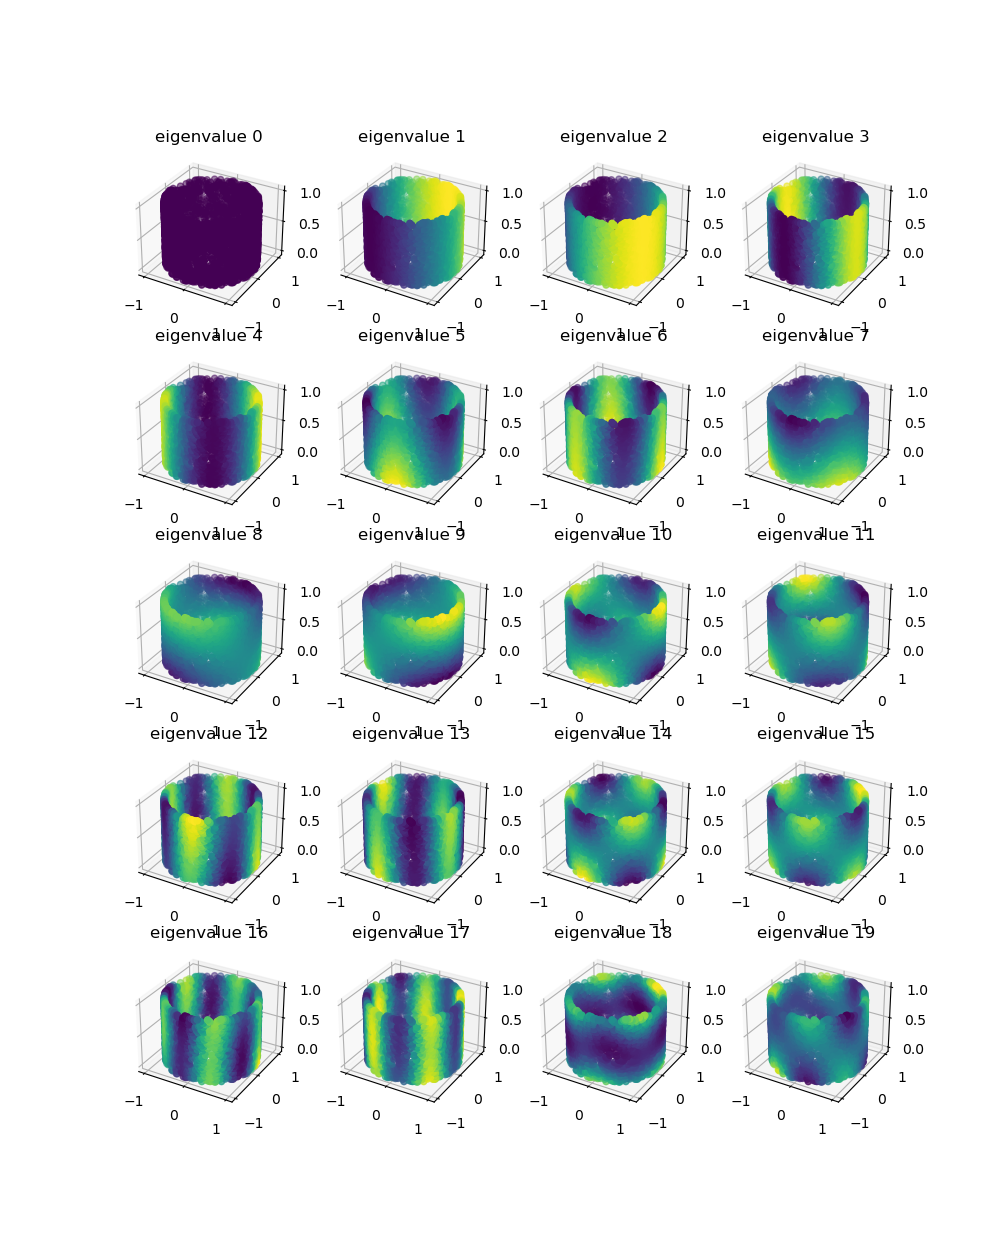

In [249]:
n_display = 20
_, axes = plt.subplots(n_display//4, 4, figsize=(10, 10 * n_display / 16),
                      subplot_kw=dict(projection='3d'))

for ax, eigen, i in zip(axes.flat, phi.T, it.count()):
    ax.scatter(sample_d_list[0][0],
               sample_d_list[0][1],
               sample_d_list[0][2],
               c=eigen
              )
    ax.set_title(f"eigenvalue {i}")
    
#plt.tight_layout()

In [258]:
best_sims

{4: 0.8367750571493393,
 5: 0.6343750052553212,
 6: 0.6788464289901774,
 8: 0.804836811958882,
 10: 0.6108956790878928,
 11: 0.7847147094422771,
 12: 0.9500487991604813,
 14: 0.7061655674711684,
 15: 0.6651264298790349,
 16: 0.6149295752655506,
 19: 0.7028818515971738}

In [256]:
best_matches

{4: [1, 2],
 5: [1, 4],
 6: [2, 4],
 8: [1, 7],
 10: [1, 9],
 11: [4, 7],
 12: [3, 4],
 14: [2, 11],
 15: [8, 12],
 16: [4, 6],
 19: [4, 10]}

<IPython.core.display.Javascript object>


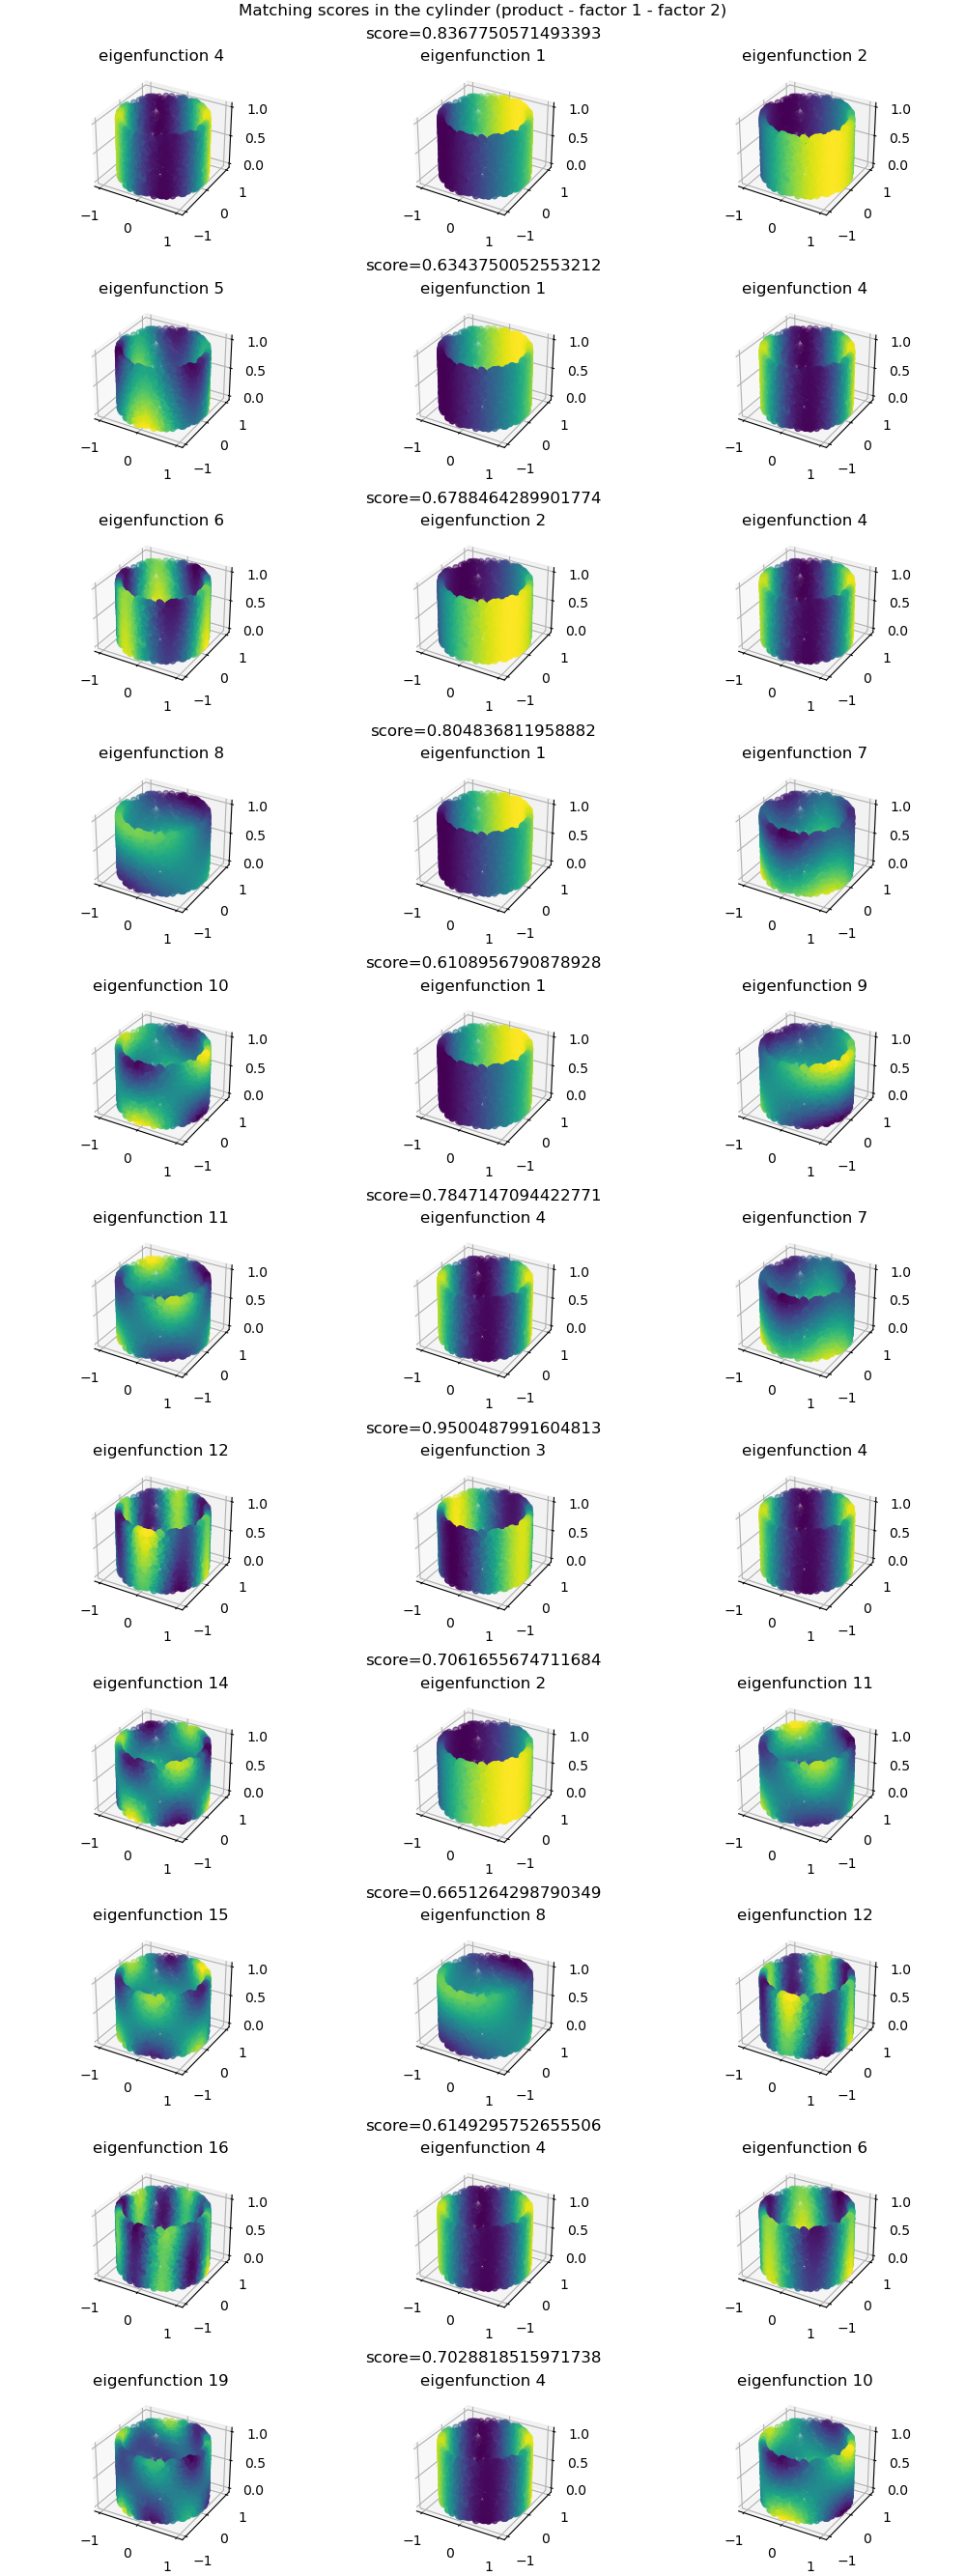

In [267]:
n_lines = len(best_matches)

fig = plt.figure(constrained_layout=True, 
                 figsize=(10, 10 * n_lines / 3))

fig.suptitle("Matching scores in the cylinder (product - factor 1 - factor 2)")

subfigs = fig.subfigures(nrows=n_lines, ncols=1)

#_, axes = plt.subplots(n_lines, 3,
#                       figsize=(10, 10 * n_lines / 3 - 10),
#                      subplot_kw=dict(projection='3d'))

for line, (k, (i, j)) in zip(subfigs, best_matches.items()):
    line.suptitle(f"score={best_sims[k]}")
    axes = line.subplots(nrows=1, ncols=3,subplot_kw=dict(projection='3d'))
    for ax, v in zip(axes, (k, i, j),):
        ax.scatter(sample_d_list[0][0],
               sample_d_list[0][1],
               sample_d_list[0][2],
               c=phi[:, v]
              )
        ax.set_title(f"eigenfunction {v}")



In [ ]:
n_lines = len(best_matches)

fig = plt.figure(constrained_layout=True, 
                 figsize=(10, 10 * n_lines / 3))

fig.suptitle("Matching scores in the cylinder (product - factor 1 - factor 2)")

subfigs = fig.subfigures(nrows=n_lines, ncols=1)

#_, axes = plt.subplots(n_lines, 3,
#                       figsize=(10, 10 * n_lines / 3 - 10),
#                      subplot_kw=dict(projection='3d'))

for line, (k, (i, j)) in zip(subfigs, best_matches.items()):
    line.suptitle(f"score={best_sims[k]}")
    axes = line.subplots(nrows=1, ncols=3,subplot_kw=dict(projection='3d'))
    for ax, v in zip(axes, (k, i, j),):
        ax.scatter(sample_d_list[0][0],
               sample_d_list[0][1],
               sample_d_list[0][2],
               c=phi[:, v]
              )
        ax.set_title(f"eigenfunction {v}")



In [245]:
best_sims

{4: 0.7963234113617479,
 9: 0.6810873944491359,
 11: 0.792086204622908,
 14: 0.853099982386061,
 15: 0.8087971993449717,
 16: 0.7105677156545642,
 17: 0.7006828025508081}

[array([1, 4]), array([2, 7])]

# Torus

In [177]:
surface_torus(X_grid, Y_grid).reshape(-1, 3)

array([[ 2.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.99994899e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.99979595e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.55719031e+00, -3.81401626e-16,  0.00000000e+00],
       [ 1.54877430e+00, -3.79340299e-16,  0.00000000e+00],
       [ 1.54030231e+00, -3.77265258e-16,  0.00000000e+00]])

In [199]:
surface_values.shape

(100, 100, 3)

<IPython.core.display.Javascript object>


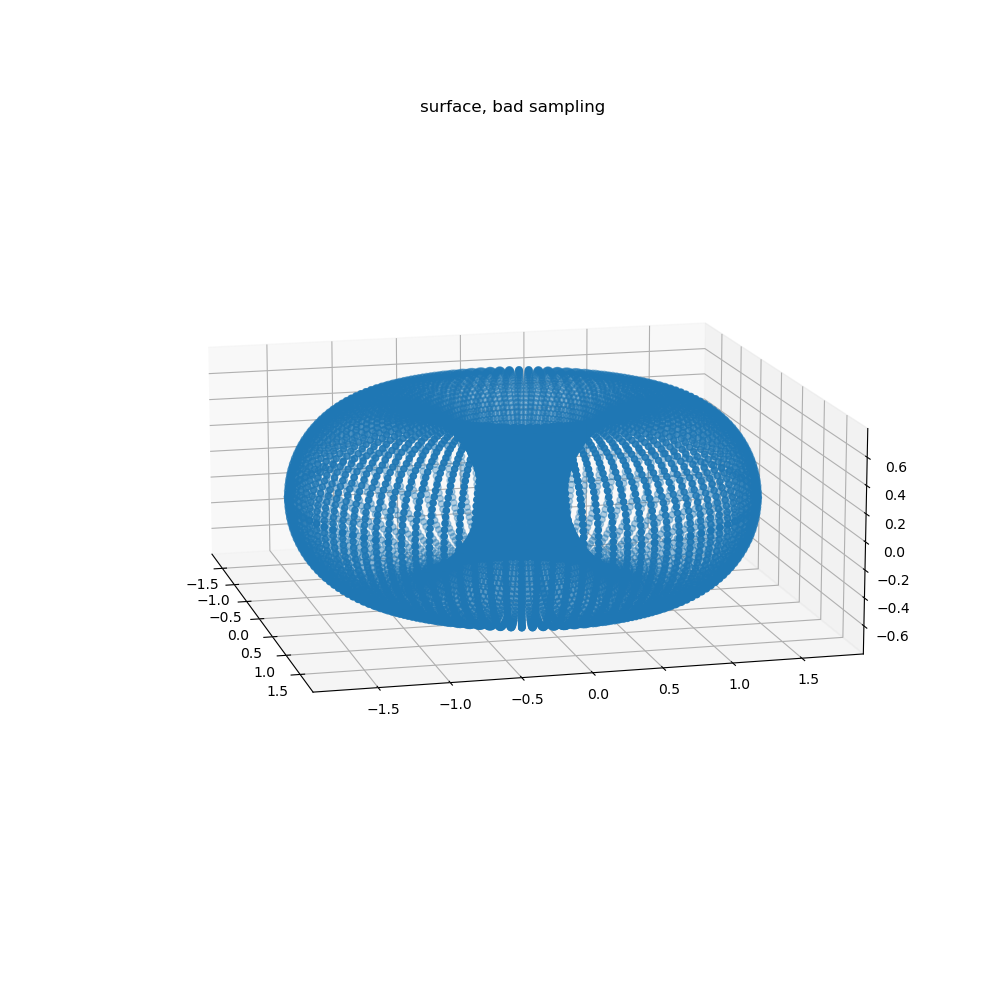

In [223]:
r1 = 1
r2 = .7

def surface_torus(theta1, theta2): 
    
    basevector = (r1 + r2 * cos(2 * pi *theta2)) * np.stack([cos(2 * pi * theta1), sin(2 * pi * theta1)])
    
    z = r2 * sin(2 * pi * theta2) 
    
    return np.stack([basevector[0], basevector[1], z], axis=0)

surface_values = surface_torus(X_grid, Y_grid)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("surface, bad sampling")
ax.set_box_aspect((np.ptp(surface_values[0]), np.ptp(surface_values[1]), np.ptp(surface_values[2])))
ax.scatter(surface_values[0],
               surface_values[1],
               surface_values[2]
   )


In [235]:
sample_torus, *_ = r_surface(5000, surface_torus, 0, 1, 0, 1)

results = factorize(data=sample_torus.T, sigma=0.1, n_eigenvectors=100, 
                    n_factors=2, 
                    eig_crit = 10,
  sim_crit = .6, seed=255)
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
    get_from_dict(results, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")


[==================  ] 90%
Manifolds...
Manifold #1 [ 1 15]
Manifold #2 [ 2  8 10 16]


<IPython.core.display.Javascript object>


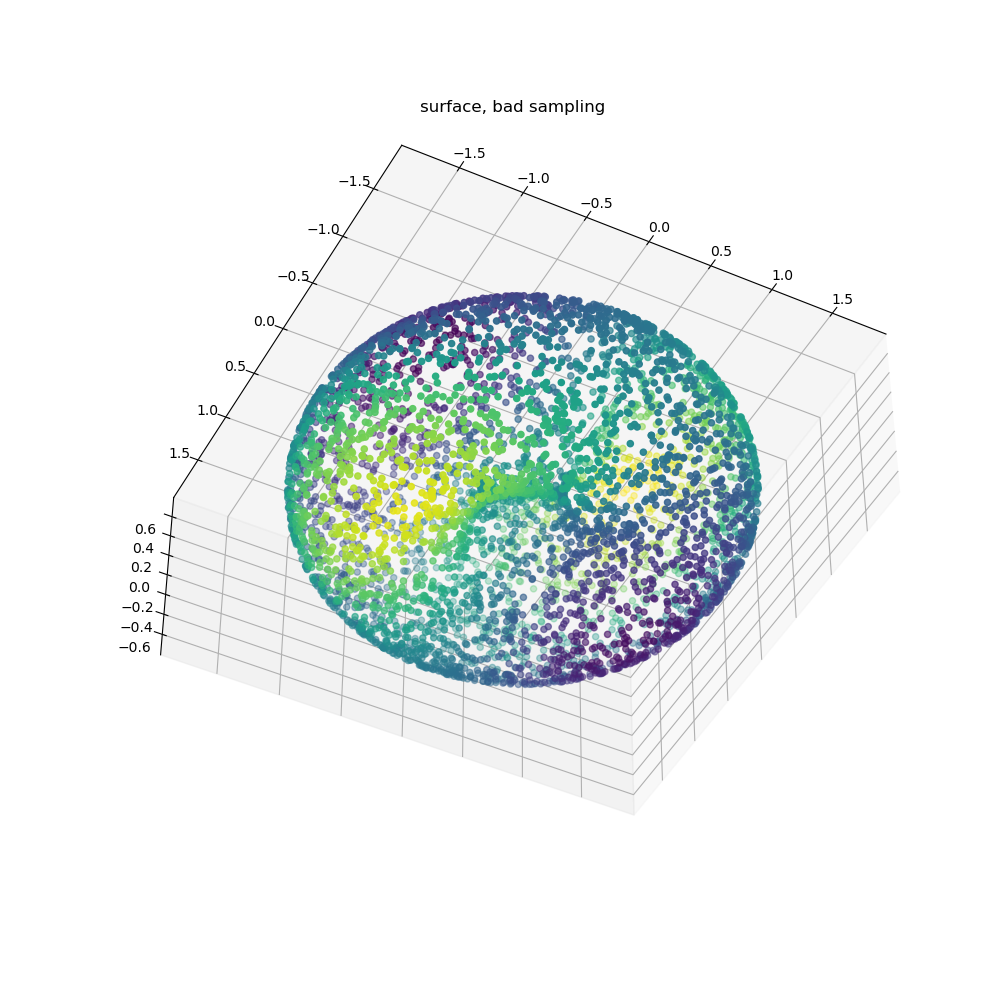

In [236]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("surface, bad sampling")
ax.set_box_aspect((np.ptp(surface_values[0]), np.ptp(surface_values[1]), np.ptp(surface_values[2])))
ax.scatter(sample_torus[0],
               sample_torus[1],
               sample_torus[2],
           c=phi[:, 8]
   )


<IPython.core.display.Javascript object>


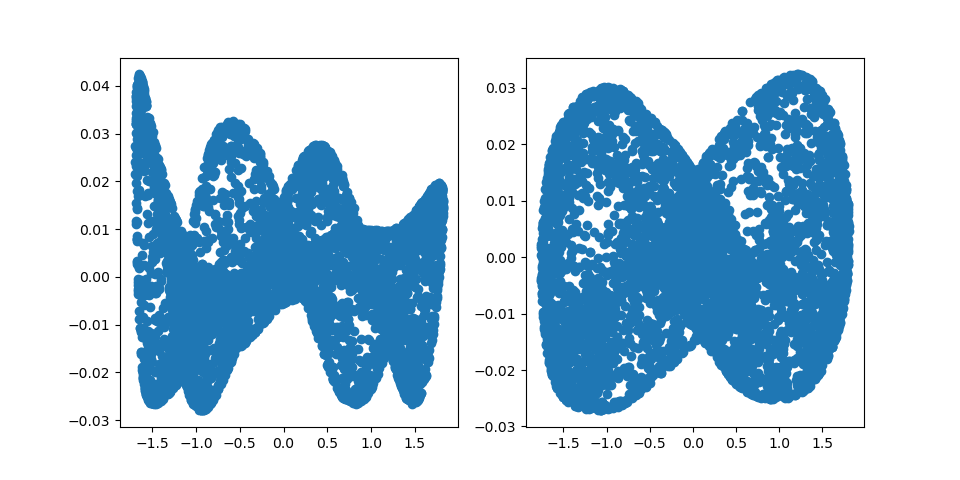

In [237]:
#plot, axes = plt.subplots(1,2,figsize=(15, 5))
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]])
ax = fig.add_subplot(1, 2, 2,)
ax.scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]])


<IPython.core.display.Javascript object>


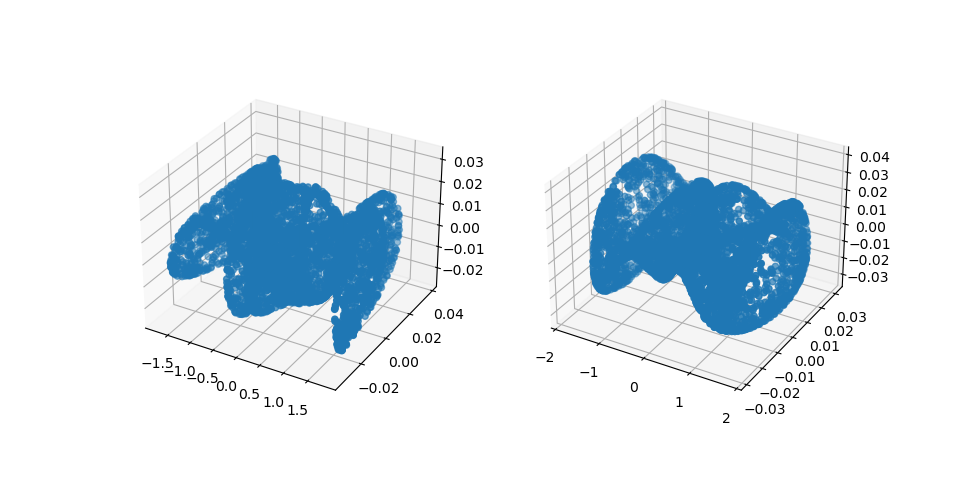

In [227]:
#plot, axes = plt.subplots(1,2,figsize=(15, 5))
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], phi[:, manifolds[0][2]])
ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]], phi[:, manifolds[1][2]])
